#Загрузка данных

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_set = pd.read_table('metro_traffic_preprocessed.csv',sep=',', engine='python')
data_set = data_set.drop(columns=['Unnamed: 0'], axis=1)
data_set.head()

holiday  temp  rain_1h  snow_1h  clouds_all  weather_main  traffic_volume  \
0        0  15.1      0.0      0.0          40             1            5545   
1        0  16.2      0.0      0.0          75             1            4516   
2        0  16.4      0.0      0.0          90             1            4767   
3        0  17.0      0.0      0.0          90             1            5026   
4        0  18.0      0.0      0.0          75             1            4918   

   weekday  hour  
0        1     2  
1        1     2  
2        1     2  
3        1     3  
4        1     3

**holiday**: 1 - праздник, 0 - нет праздника       
**temp**: температура в градусах цельсия           
**rain_1h**:    количество осадков в мм, выпавших за час       
**snow_1h**:   Количество снега в мм, выпавшего за час  
**clouds_all**:  Облачность в процентах


**weather_main**: Краткое описание текущей погоды
*   Облачно : 1,
*   Ясно : 2,
*   Туман : 3,
*   Дождь : 4,
*   Снег : 5,
*   Морось : 6,
*   Мгла : 7,
*   Гроза : 8,
*   Густой туман : 9,
*   Дымка : 10,
*   Шквалистый ветер : 11









**traffic_volume**: объём трафика weekday: день недели, 0 - понедельник, 6 - воскресенье

**weekday**:    день недели, 0 - понедельник, 6 - воскресенье

**hour**:   
*   Early_Morning : 1,
*   Morning : 2,
*   Afternoon : 3,
*   Evening : 4,
*   Night : 5
*   Late_Night : 6

In [ ]:
cols = ['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weekday', 'hour', 'traffic_volume']
data_set = data_set.reindex(columns=cols)
data_set.head()

holiday  temp  rain_1h  snow_1h  clouds_all  weather_main  weekday  hour  \
0        0  15.1      0.0      0.0          40             1        1     2   
1        0  16.2      0.0      0.0          75             1        1     2   
2        0  16.4      0.0      0.0          90             1        1     2   
3        0  17.0      0.0      0.0          90             1        1     3   
4        0  18.0      0.0      0.0          75             1        1     3   

   traffic_volume  
0            5545  
1            4516  
2            4767  
3            5026  
4            4918

Разбиение выборки

In [ ]:
X = data_set.iloc[:, :-1].values
y = data_set.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(X)

[[ 0.  15.1  0.  ...  1.   1.   2. ]
 [ 0.  16.2  0.  ...  1.   1.   2. ]
 [ 0.  16.4  0.  ...  1.   1.   2. ]
 ...
 [ 0.   9.6  0.  ...  8.   6.   5. ]
 [ 0.   8.9  0.  ...  1.   6.   5. ]
 [ 0.   9.   0.  ...  1.   6.   5. ]]


In [ ]:
print(y)

[5545 4516 4767 ... 2159 1450  954]


#Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)
y_pred_lin = lin_regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Средняя абсолютная ошибка (MAE):', metrics.mean_absolute_error(y_test, y_pred_lin))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y_test, y_pred_lin, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y_test, y_pred_lin))
print('R^2:', 	metrics.r2_score(y_test, y_pred_lin))

Средняя абсолютная ошибка (MAE): 1401.2018498550979
Среднеквадратическая ошибка (RMSE): 1719.0123384047497
Средняя квадратичная ошибка (MSE): 2955003.4195877654
R^2: 0.2539418498958991


[Ссылка на документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)

Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'fit_intercept': [True, False],
             'n_jobs': [5, 10 ,25, 30, 40, 55, 70, 100]} 
random_search = RandomizedSearchCV(lin_regressor, param_dist, cv = 3) 
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'n_jobs': [5, 10, 25, 30, 40, 55, 70,
                                                   100]})

In [ ]:
print("Лучшие параметры", random_search.best_params_)

Лучшие параметры {'n_jobs': 100, 'fit_intercept': True}


#Регрессия дерева решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Средняя абсолютная ошибка (MAE):', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y_test, y_pred_dt, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y_test, y_pred_dt))
print('R^2:', 	metrics.r2_score(y_test, y_pred_dt))

Средняя абсолютная ошибка (MAE): 789.2970767209488
Среднеквадратическая ошибка (RMSE): 1316.6855808372743
Средняя квадратичная ошибка (MSE): 1733660.9187847904
R^2: 0.562297678099881


[Ссылка на документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Подбор гиперпараметров

In [ ]:
dt_regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dt_params = {'splitter': ['best', 'random'],
             'max_depth' : [10, 40, 60, 70, 100, 150, 200, 250, 300],
             'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]} 
random_search = RandomizedSearchCV(dt_regressor, dt_params, cv = 3) 
random_search.fit(X_train, y_train) 

In [ ]:
print("Лучшие параметры", random_search.best_params_);

Лучшие параметры {'splitter': 'best', 'min_samples_split': 50, 'max_features': 5, 'max_depth': 10}


#LASSO

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [ ]:
print('Средняя абсолютная ошибка (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y_test, y_pred_lasso, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y_test, y_pred_lasso))
print('R^2:', metrics.r2_score(y_test, y_pred_lasso))

Средняя абсолютная ошибка (MAE): 1401.6035478170074
Среднеквадратическая ошибка (RMSE): 1719.233693292531
Средняя квадратичная ошибка (MSE): 2955764.4921522764
R^2: 0.2537496997326165


[Ссылка на документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

Подбор гиперпараметров

In [ ]:
lasso_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
lasso_params = {'fit_intercept': [True, False],
             'alpha': [1, 5, 10 ,25, 30, 40, 55, 70, 100],
             'max_iter': [5, 10, 20, 30, 40, 55, 70, 100, 200, 400, 500, 1000]} 
random_search = RandomizedSearchCV(lasso_reg, lasso_params, cv = 3) 
random_search.fit(X_train, y_train) 

In [ ]:
print("Лучшие параметры", random_search.best_params_) 

Лучшие параметры {'max_iter': 20, 'fit_intercept': True, 'alpha': 40}


#Гребневая регрессия

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
print('Средняя абсолютная ошибка (MSE):', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y_test, y_pred_ridge, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y_test, y_pred_ridge))
print('R^2:', metrics.r2_score(y_test, y_pred_ridge))

Средняя абсолютная ошибка (MSE): 1401.2084040088705
Среднеквадратическая ошибка (RMSE): 1719.0265825502067
Средняя квадратичная ошибка (MSE): 2955052.391514243
R^2: 0.2539294858138026


[Ссылка на документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

#Elastic Net регрессия

In [ ]:
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet()
en_reg.fit(X_train, y_train)
y_pred_en = en_reg.predict(X_test)

In [ ]:
print('Средняя абсолютная ошибка (MSE):', metrics.mean_absolute_error(y_test, y_pred_en))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y_test, y_pred_en, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y_test, y_pred_en))
print('R^2:', metrics.r2_score(y_test, y_pred_en))

Средняя абсолютная ошибка (MSE): 1433.381503958545
Среднеквадратическая ошибка (RMSE): 1723.782508997506
Средняя квадратичная ошибка (MSE): 2971426.138325737
R^2: 0.24979555920800534


[Ссылка на документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

#Линейная регрессия

Повторное разбиение выборки

In [ ]:
X = data_set.drop(columns = ['traffic_volume']).values
y = data_set['traffic_volume']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X = np.hstack([X, np.ones((X.shape[0], 1))]) 

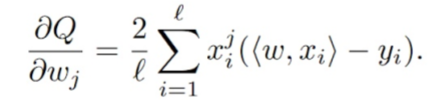

In [ ]:
def linear_prediction(X, w):
  return np.dot(X, w)

def stochastic_gradient_step(X, y, w, eta=0.01):
  x_k = X
  y_k = y
  y_pred = np.dot(x_k, w)
  l = X.shape[0]
  t = w - (2*eta/l)*np.dot((y_pred - y_k), x_k)
  return t

def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                              min_weight_dist=1e-8):
  weight_dist = np.inf # Инициализируем расстояние между векторами весов на соседних итерациях большим числом
  w = w_init # Инициализируем вектор весов
  ws = [] #Список ошибок на каждой итерации
  iter_num = 0 # Счетчик итераций
  
  while weight_dist > min_weight_dist and iter_num < max_iter:
      old_w = w 
      w = stochastic_gradient_step(X, y, w, eta=eta)
      weight_dist =  np.linalg.norm(w - old_w) # вычисляет норму матрицы
      iter_num += 1 
      ws.append(w) #записываем в список
  return w, ws

Обучение:

In [ ]:
stoch_grad_desc_weights, ws = stochastic_gradient_descent(X, y, np.ones((X.shape[1])), eta=1e-2, max_iter=10**4)

In [ ]:
for i in range(len(ws)):
  y_pred = linear_prediction(X, ws[i])

Оценка:

In [ ]:
print('Средняя абсолютная ошибка (MSE):', metrics.mean_absolute_error(y, y_pred))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y, y_pred, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y, y_pred))
print('R^2:', metrics.r2_score(y, y_pred))

Средняя абсолютная ошибка (MSE): 1388.5752601506933
Среднеквадратическая ошибка (RMSE): 1704.4294333627188
Средняя квадратичная ошибка (MSE): 2905079.6933131586
R^2: 0.26407724090170437


Результаты Sklearn:

Средняя абсолютная ошибка (MAE): 789.2970767209488

Среднеквадратическая ошибка (RMSE): 1316.6855808372743

Средняя квадратичная ошибка (MSE): 1733660.9187847904

R^2: 0.562297678099881

#Дерево решений

Повторное разбиение выборки

In [ ]:
from linreg_treereg import TreeRegressor
from linreg_treereg import Node

In [ ]:
X = data_set.drop(columns = ['traffic_volume']).values
y = data_set['traffic_volume']

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, shuffle=False)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Обучение:

In [ ]:
reg = TreeRegressor(min_samples_split=3, max_depth=3)
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test) 

Оценка:

In [ ]:
print('Средняя абсолютная ошибка (MSE):', metrics.mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Средняя квадратичная ошибка (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Средняя абсолютная ошибка (MSE): 738.2745384112546
Среднеквадратическая ошибка (RMSE): 1043.6960718335952
Средняя квадратичная ошибка (MSE): 1089301.490360877
R^2: 0.720719282064773


Результаты Sklearn

Средняя абсолютная ошибка (MAE): 790.6867821456971

Среднеквадратическая ошибка (RMSE): 1311.2399439073104

Средняя квадратичная ошибка (MSE): 1719350.1904980466

R^2: 0.5641754574354778